<a href="https://colab.research.google.com/github/won195/TIL/blob/master/KOSIS_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 한국공항공사, 인천국제공항공사,「항공통계」, 2023.09, 2023.11.14, 항공사별 통계

* https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&conn_path=I2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import koreanize_matplotlib

In [9]:
df_comp = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/kosis-airline-company.csv", encoding='cp949', dtype={"시점": "object"})
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245
3716,2023.09,에어프레미아,도착,111,29206,1367
3717,2023.09,에어프레미아,출발,111,32302,1453
3718,2023.09,외항사,도착,6585,925104,50054


In [10]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3720 non-null   object
 1   항공사별(1)   3720 non-null   object
 2   도착출발별(1)  3720 non-null   object
 3   운항 (편)    3720 non-null   int64 
 4   여객 (명)    3720 non-null   int64 
 5   화물 (톤)    3720 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 174.5+ KB


In [11]:
df_comp.groupby('항공사별(1)').sum()

<ipython-input-11-07be65e8dbc2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comp.groupby('항공사별(1)').sum()


,운항 (편),여객 (명),화물 (톤)
항공사별(1),,,
대한항공,3653234,558999512,33468741
아시아나항공,2508761,374489490,16195331
에어로케이항공,11094,1665778,9746
에어부산,801352,119221666,830405
에어서울,88989,16120677,91451
에어인천,17513,0,175465
에어프레미아,3073,744170,30656
외항사,2215319,307123817,19355037
이스타항공,431975,65786073,388564


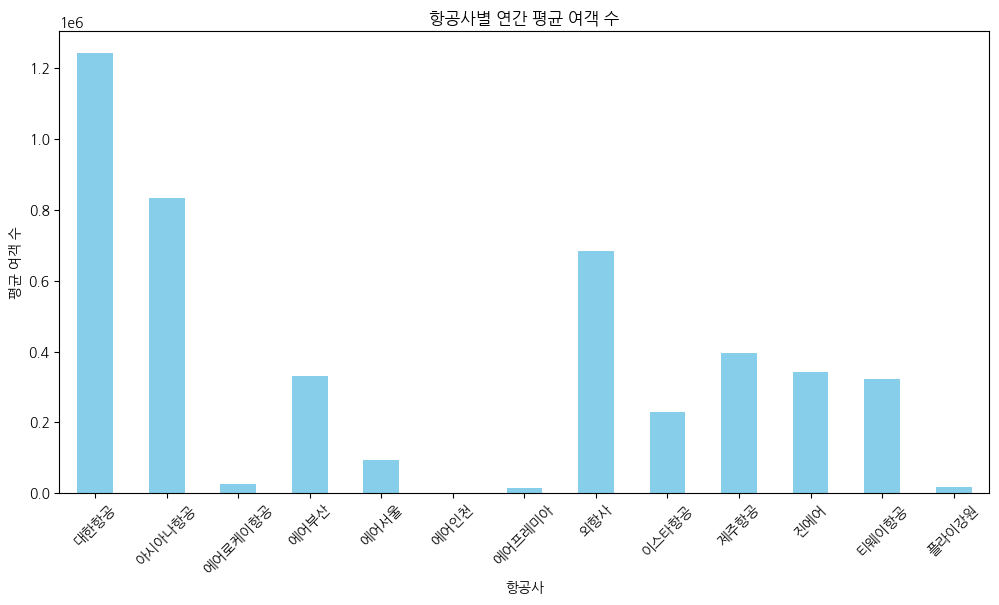

In [12]:
# 항공사별로 연간 평균 여객 수 계산
average_passengers_by_airline = df_comp.groupby("항공사별(1)")["여객 (명)"].mean()

plt.figure(figsize=(12, 6))
average_passengers_by_airline.plot(kind="bar", color="skyblue")
plt.title("항공사별 연간 평균 여객 수")
plt.xlabel("항공사")
plt.ylabel("평균 여객 수")
plt.xticks(rotation=45)
plt.show()


# 연간 운항 및 여객 증가율 계산

 * 연간 운항 편수 및 여객 수의 증가율을 계산하여 항공사별로 비교합니다

In [13]:
df_comp["운항 (편)_증가율"] = df_comp.groupby("항공사별(1)")["운항 (편)"].pct_change() * 100

df_comp["여객 (편)_증가율"] = df_comp.groupby("항공사별(1)")["여객 (명)"].pct_change() * 100
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (편)_증가율
0,2005.01,아시아나항공,도착,6613,791439,28012,NaN,NaN
1,2005.01,아시아나항공,출발,6610,799835,29576,-0.045365,1.060852
2,2005.01,대한항공,도착,8869,1372897,70544,NaN,NaN
3,2005.01,대한항공,출발,8870,1405847,78329,0.011275,2.400034
4,2005.01,외항사,도착,3145,443386,28311,NaN,NaN
...,...,...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245,0.000000,3.891187
3716,2023.09,에어프레미아,도착,111,29206,1367,-11.200000,-18.500949
3717,2023.09,에어프레미아,출발,111,32302,1453,0.000000,10.600562
3718,2023.09,외항사,도착,6585,925104,50054,-1.994344,-12.460363


# 도착/출발별로 연간 운항 및 여객 분석:
  * 도착과 출발별로 연간 운항 편수 및 여객 수를 분석합니다

In [14]:
arrival_stats = df_comp[df_comp["도착출발별(1)"] == "도착"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

departure_stats = df_comp[df_comp["도착출발별(1)"] == "출발"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

In [15]:
arrival_stats

,운항 (편),여객 (명)
시점,,
2005.01,18627,2607722
2005.02,17112,2451062
2005.03,18342,2462065
2005.04,18735,2823164
2005.05,19511,2836185
...,...,...
2023.05,33421,5529102
2023.06,33028,5618913
2023.07,34656,5743000


<Axes: xlabel='시점'>

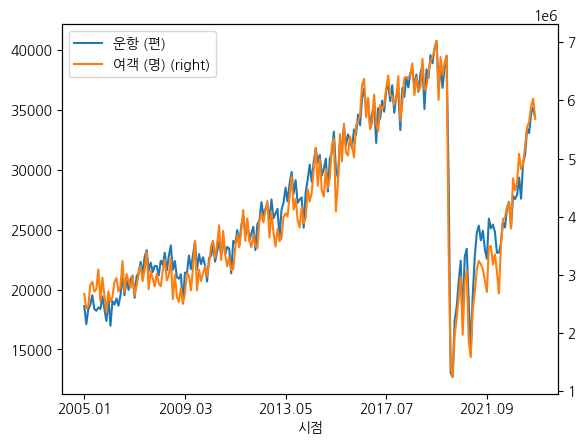

In [16]:
departure_stats.plot(secondary_y="여객 (명)")

# 시간에 따른 화물 운송량 시각화:
  * 시간에 따른 화물 운송량의 추이를 시각화합니다.

In [17]:
# 시간에 따른 화물 운송량 시각화
df_comp["시점"] = pd.to_datetime(df_comp["시점"])

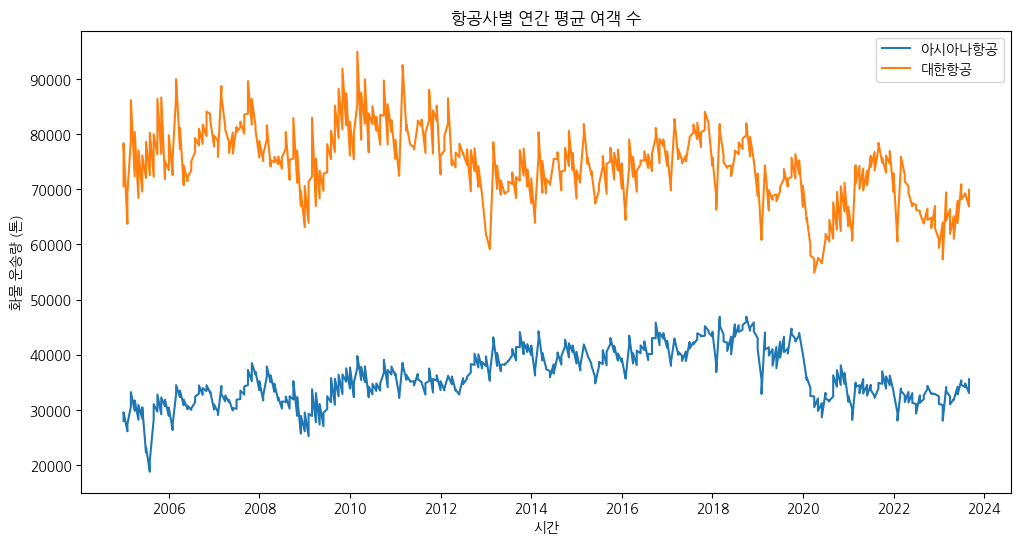

In [18]:

plt.figure(figsize=(12, 6))
plt.plot(df_comp[df_comp["항공사별(1)"] == "아시아나항공"]["시점"], df_comp[df_comp["항공사별(1)"] == "아시아나항공"]["화물 (톤)"], label="아시아나항공")
plt.plot(df_comp[df_comp["항공사별(1)"] == "대한항공"]["시점"], df_comp[df_comp["항공사별(1)"] == "대한항공"]["화물 (톤)"], label="대한항공")
plt.xlabel("시간")
plt.ylabel("화물 운송량 (톤)")
plt.legend()
plt.title("항공사별 연간 평균 여객 수")
plt.show()

* 데이터를 다시 로드하여 df_comp 초기화

In [19]:
df_comp = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/kosis-airline-company.csv", encoding='cp949', dtype={"시점": "object"})
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245
3716,2023.09,에어프레미아,도착,111,29206,1367
3717,2023.09,에어프레미아,출발,111,32302,1453
3718,2023.09,외항사,도착,6585,925104,50054


In [20]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [21]:
reduce_mem_usage(df_comp)
df_comp.info()

Memory usage of dataframe is 0.17 MB
Memory usage after optimization is: 0.12 MB
Decreased by 29.1%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3720 non-null   object
 1   항공사별(1)   3720 non-null   object
 2   도착출발별(1)  3720 non-null   object
 3   운항 (편)    3720 non-null   int16 
 4   여객 (명)    3720 non-null   int32 
 5   화물 (톤)    3720 non-null   int32 
dtypes: int16(1), int32(2), object(3)
memory usage: 123.6+ KB


In [22]:
df_comp.columns = ['시점', '항공사', '도착출발', '운항_편', '여객_명', '화물_톤']
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245
3716,2023.09,에어프레미아,도착,111,29206,1367
3717,2023.09,에어프레미아,출발,111,32302,1453
3718,2023.09,외항사,도착,6585,925104,50054


In [23]:
df_comp["연도"] = df_comp["시점"].astype(str).str[:4].astype(int)
df_comp["월"] = df_comp["시점"].map(lambda x: int(x.split(".")[1][:2]))
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤,연도,월
0,2005.01,아시아나항공,도착,6613,791439,28012,2005,1
1,2005.01,아시아나항공,출발,6610,799835,29576,2005,1
2,2005.01,대한항공,도착,8869,1372897,70544,2005,1
3,2005.01,대한항공,출발,8870,1405847,78329,2005,1
4,2005.01,외항사,도착,3145,443386,28311,2005,1
...,...,...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245,2023,9
3716,2023.09,에어프레미아,도착,111,29206,1367,2023,9
3717,2023.09,에어프레미아,출발,111,32302,1453,2023,9
3718,2023.09,외항사,도착,6585,925104,50054,2023,9


In [24]:
# 데이터의 개수 => 통계치가 아님에 주의
# 데이터 전처리가 잘 되었는지 확인하는 용

pd.crosstab(df_comp["연도"], df_comp["월"])

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2005,6,6,6,6,6,6,6,6,6,6,6,6
2006,6,6,6,6,6,8,8,8,8,8,8,8
2007,8,8,8,8,8,8,8,8,8,8,8,8
2008,8,8,8,8,8,8,10,10,10,12,12,12
2009,14,14,14,14,14,14,14,14,14,14,14,14
2010,14,14,14,14,14,14,14,14,16,16,16,16
2011,16,16,16,16,16,16,16,16,16,16,16,16
2012,16,16,16,16,16,16,16,16,16,16,16,16
2013,16,16,18,18,18,18,18,18,18,18,18,18


In [25]:
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤,연도,월
0,2005.01,아시아나항공,도착,6613,791439,28012,2005,1
1,2005.01,아시아나항공,출발,6610,799835,29576,2005,1
2,2005.01,대한항공,도착,8869,1372897,70544,2005,1
3,2005.01,대한항공,출발,8870,1405847,78329,2005,1
4,2005.01,외항사,도착,3145,443386,28311,2005,1
...,...,...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245,2023,9
3716,2023.09,에어프레미아,도착,111,29206,1367,2023,9
3717,2023.09,에어프레미아,출발,111,32302,1453,2023,9
3718,2023.09,외항사,도착,6585,925104,50054,2023,9


In [26]:
year_comp = pd.crosstab(index = df_comp["연도"],
            columns = df_comp["항공사"],
            values=df_comp["여객_명"],
            aggfunc="sum").fillna(0).astype(int)

In [27]:
year_comp.style.background_gradient(axis=None).format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"34,721,098","18,535,331",0,0,0,0,0,"11,319,209",0,0,0,0,0
2006,"34,990,013","19,284,957",0,0,0,0,0,"12,856,097",0,"508,612",0,0,0
2007,"34,654,664","19,352,387",0,0,0,0,0,"15,483,064",0,"1,649,508",0,0,0
2008,"33,096,441","19,786,251",0,"205,580",0,0,0,"14,579,456",0,"1,955,455","329,510",0,0
2009,"30,397,856","18,103,278",0,"2,841,444",0,0,0,"11,579,865","1,996,549","2,902,584","2,431,545",0,0
2010,"33,095,526","19,470,441",0,"4,134,712",0,0,0,"13,495,430","3,726,008","3,960,525","3,009,247","308,876",0
2011,"31,644,789","19,692,263",0,"4,632,692",0,0,0,"14,590,031","3,366,115","5,365,058","3,096,266","2,999,202",0
2012,"32,412,913","20,541,440",0,"4,955,130",0,0,0,"15,982,369","3,918,272","6,551,702","3,893,786","3,498,629",0
2013,"30,837,092","21,158,822",0,"5,855,989",0,0,0,"17,819,459","4,639,327","7,567,220","4,655,414","4,106,794",0


In [28]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [29]:
year_comp = pd.crosstab(index = df_comp["연도"],
            columns = df_comp["항공사"],
            values=df_comp["운항_편"],
            aggfunc="sum").fillna(0).astype(int)
year_comp.style.background_gradient(axis=None, cmap="Greens").format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"211,868","149,283",0,0,0,0,0,"80,798",0,0,0,0,0
2006,"212,738","146,808",0,0,0,0,0,"98,587",0,"9,568",0,0,0
2007,"220,360","145,843",0,0,0,0,0,"126,258",0,"27,152",0,0,0
2008,"217,270","156,893",0,"2,988",0,0,0,"122,093",0,"25,850","4,176",0,0
2009,"205,682","138,039",0,"29,782",0,0,0,"87,488","16,339","29,684","20,238",0,0
2010,"205,596","134,779",0,"37,230",0,0,0,"95,422","28,387","26,449","18,761","3,286",0
2011,"204,322","138,614",0,"38,162",0,0,0,"103,867","26,739","32,030","20,072","19,789",0
2012,"214,577","141,423",0,"39,710",0,0,0,"113,579","30,227","39,696","24,249","21,502",0
2013,"210,492","147,175",0,"46,911",0,416,0,"125,595","33,275","45,558","29,018","24,049",0


In [30]:
year_comp = pd.crosstab(index = df_comp["연도"],
            columns = df_comp["항공사"],
            values=df_comp["화물_톤"],
            aggfunc="sum").fillna(0).astype(int)
year_comp.style.background_gradient(axis=None, cmap="Oranges").format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"1,819,380","685,632",0,0,0,0,0,"856,586",0,0,0,0,0
2006,"1,879,078","762,478",0,0,0,0,0,"919,935",0,"2,554",0,0,0
2007,"1,954,382","788,058",0,0,0,0,0,"1,020,715",0,"7,968",0,0,0
2008,"1,814,978","781,787",0,"2,688",0,0,0,"894,448",0,"10,437","1,548",0,0
2009,"1,829,704","755,899",0,"22,502",0,0,0,"763,007","10,088","17,570","11,060",0,0
2010,"1,984,831","854,546",0,"29,819",0,0,0,"922,326","18,540","24,025","15,141","1,418",0
2011,"1,940,378","849,214",0,"35,402",0,0,0,"895,267","17,466","31,583","17,754","13,305",0
2012,"1,813,203","861,968",0,"37,500",0,0,0,"917,498","22,318","43,824","24,860","18,162",0
2013,"1,687,503","953,876",0,"43,707",0,"2,909",0,"929,790","27,465","53,750","31,009","21,623",0


In [31]:
df_comp["항공사"].unique()

array(['아시아나항공', '대한항공', '외항사', '제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공', '에어프레미아'], dtype=object)

<Axes: title={'center': '저가항공 연도별 여객 수'}, xlabel='연도'>

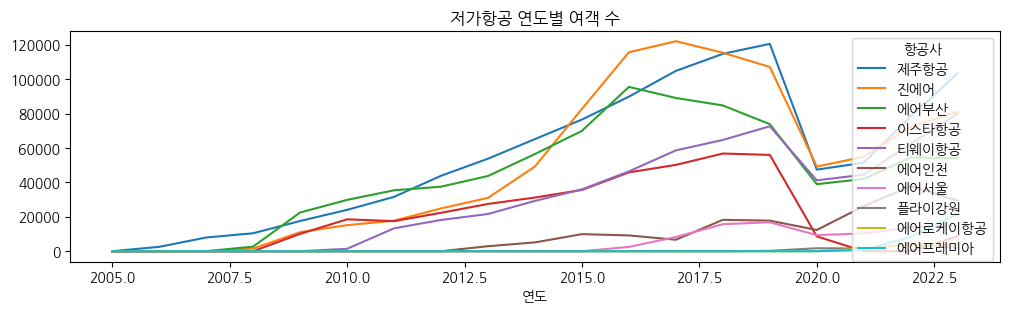

In [32]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공', '에어프레미아']].plot(figsize=(12, 3), title="저가항공 연도별 여객 수")

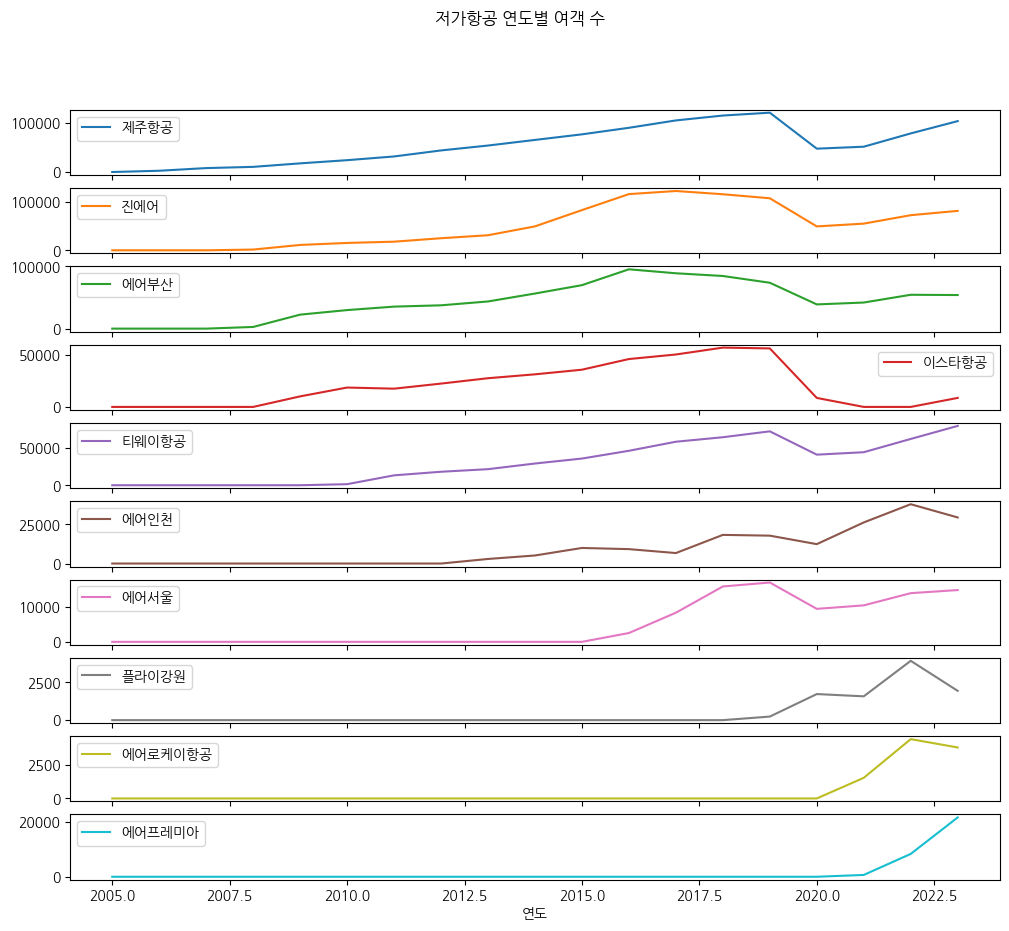

In [33]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공', '에어프레미아']].plot(figsize=(12, 10), title="저가항공 연도별 여객 수", subplots=True);

# 한국공항공사, 인천국제공항공사, 「항공통계」, 2023.08, 2023.10.08, 국제선 지역별 통계
* https://www.narastat.kr/metasvc/index.do?orgId=381&confmNo=920005&kosisYn=Y

In [77]:
df_region = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/kosis-airline-region.csv", encoding='cp949')
#reduce_mem_usage(df_region)
df_region.shape

(3806, 6)

In [71]:
df_region

,지역,시점,도착출발,운항_편,여객_명,화물_톤
0,일본,2005.0,도착,1733,351340,16217
1,일본,2005.0,출발,1736,379355,17319
2,일본,2005.0,도착,1662,361438,16566
3,일본,2005.0,출발,1655,343217,16572
4,일본,2005.0,도착,1852,386047,18001
...,...,...,...,...,...,...
3801,기타,2022.0,출발,0,0,0
3802,기타,2023.0,도착,0,0,0
3803,기타,2023.0,출발,0,0,0
3804,기타,2023.0,도착,0,0,0


In [78]:
df_region.columns = ['지역', '시점', '도착출발', '운항_편', '여객_명', '화물_톤']
df_region.head(2)

,지역,시점,도착출발,운항_편,여객_명,화물_톤
0,일본,2005.01,도착,1733,351340,16217
1,일본,2005.01,출발,1736,379355,17319


In [67]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      3806 non-null   object 
 1   시점      3806 non-null   float16
 2   도착출발    3806 non-null   object 
 3   운항_편    3806 non-null   int16  
 4   여객_명    3806 non-null   int32  
 5   화물_톤    3806 non-null   int32  
dtypes: float16(1), int16(1), int32(2), object(2)
memory usage: 104.2+ KB


In [68]:
df_region.isnull().sum()

지역      0
시점      0
도착출발    0
운항_편    0
여객_명    0
화물_톤    0
dtype: int64

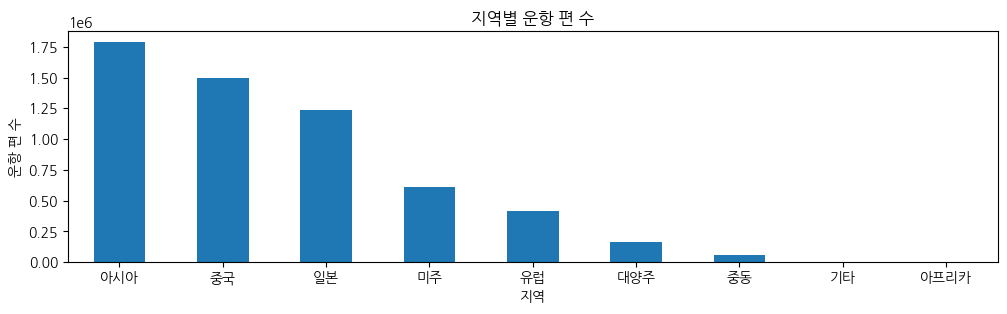

In [69]:
# 1. 지역별 운항 편 수 분석
region_flight_counts = df_region.groupby("지역")["운항_편"].sum().sort_values(ascending=False)
region_flight_counts.plot(kind="bar", figsize=(12, 3), rot=0)
plt.title("지역별 운항 편 수")
plt.xlabel("지역")
plt.ylabel("운항 편 수")
plt.show()

In [79]:
# ESC + m + y => 코드셀로 변환
# 2.월별 운항 편 수 추이 시각
df_region["시점"] = pd.to_datetime(df_region["시점"].astype(str), format="%Y.%m")
df_region["시점"]

0      2005-01-01
1      2005-01-01
2      2005-02-01
3      2005-02-01
4      2005-03-01
          ...    
3801   2022-12-01
3802   2023-01-01
3803   2023-01-01
3804   2023-05-01
3805   2023-05-01
Name: 시점, Length: 3806, dtype: datetime64[ns]

In [80]:
df_region["연도"] = df_region["시점"].dt.year
df_region["월"] = df_region["시점"].dt.month
df_region

,지역,시점,도착출발,운항_편,여객_명,화물_톤,연도,월
0,일본,2005-01-01,도착,1733,351340,16217,2005,1
1,일본,2005-01-01,출발,1736,379355,17319,2005,1
2,일본,2005-02-01,도착,1662,361438,16566,2005,2
3,일본,2005-02-01,출발,1655,343217,16572,2005,2
4,일본,2005-03-01,도착,1852,386047,18001,2005,3
...,...,...,...,...,...,...,...,...
3801,기타,2022-12-01,출발,0,0,0,2022,12
3802,기타,2023-01-01,도착,0,0,0,2023,1
3803,기타,2023-01-01,출발,0,0,0,2023,1
3804,기타,2023-05-01,도착,0,0,0,2023,5


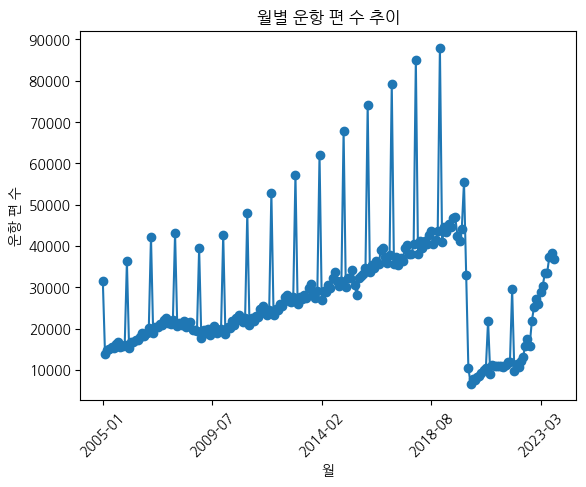

In [81]:
monthly_flight_counts = df_region.groupby(df_region["시점"].dt.strftime("%Y-%m"))["운항_편"].sum()
monthly_flight_counts.plot(kind="line", marker="o")
plt.title("월별 운항 편 수 추이")
plt.xlabel("월")
plt.ylabel("운항 편 수")
plt.xticks(rotation=45)
plt.show()

In [85]:
df_region[df_region["월"] == 1]

,지역,시점,도착출발,운항_편,여객_명,화물_톤,연도,월
0,일본,2005-01-01,도착,1733,351340,16217,2005,1
1,일본,2005-01-01,출발,1736,379355,17319,2005,1
18,일본,2005-01-01,도착,2004,388373,20450,2005,1
19,일본,2005-01-01,출발,2001,395721,19973,2005,1
24,일본,2006-01-01,도착,1974,336596,18611,2006,1
...,...,...,...,...,...,...,...,...
3783,기타,2021-01-01,출발,18,1961,0,2021,1
3788,기타,2022-01-01,도착,14,1966,1,2022,1
3789,기타,2022-01-01,출발,14,1966,1,2022,1
3802,기타,2023-01-01,도착,0,0,0,2023,1


In [86]:
monthly_flight_counts.iloc[:20]

시점
2005-01    31514
2005-02    13921
2005-03    14790
2005-04    14931
2005-05    15597
2005-06    15284
2005-07    16324
2005-08    16680
2005-09    15540
2005-11    15773
2005-12    16053
2006-01    36251
2006-02    15278
2006-03    16668
2006-04    16718
2006-05    17275
2006-06    17142
2006-07    18012
2006-08    18961
2006-09    18308
Name: 운항_편, dtype: int64

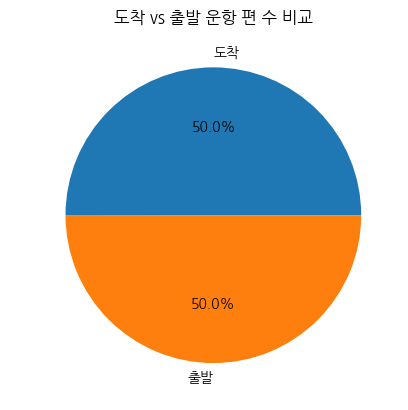

In [90]:
# 3. 도착 vs 출발 운항 비교
arrival_vs_depatyure = df_region.groupby("도착출발")["운항_편"].sum()
arrival_vs_depatyure.plot(kind="pie", autopct='%1.1f%%')
plt.title("도착 vs 출발 운항 편 수 비교")
plt.ylabel(" ")
plt.show()

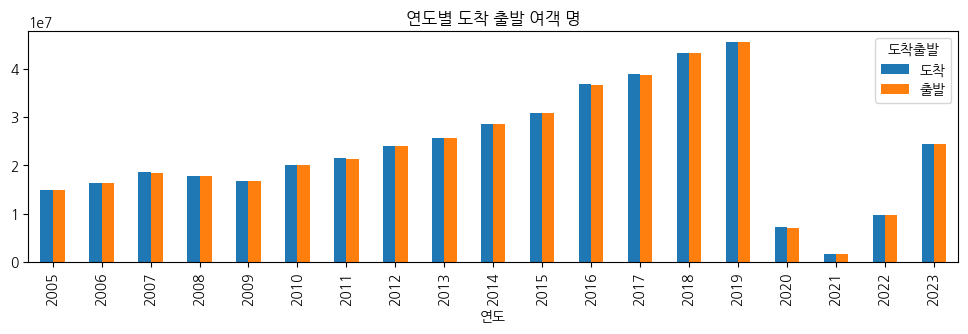

In [104]:
pd.crosstab(index = df_region["도착출발"],
            columns = df_region["연도"],
            values=df_region["여객_명"], aggfunc="sum").T.plot(kind="bar",figsize=(12, 3), title="연도별 도착 출발 여객 명");

In [97]:
# 변경된 코드: groupby를 사용한 운항 편 수 집계
grouped_data = df_region.groupby(["도착출발", df_region["시점"].dt.year])["운항_편"].sum().unstack()
grouped_data

시점,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
도착출발,,,,,,,,,,,,,,,,,,,
도착,93138,106786,126510,124840,116205,128304,140261,156860,169496,183241,193987,219432,228553,248532,264078,83587,65591,91048,145901
출발,93269,106823,126527,124886,116281,128390,140310,156885,169493,183244,194027,219432,228550,248559,264165,83627,65859,91714,146105


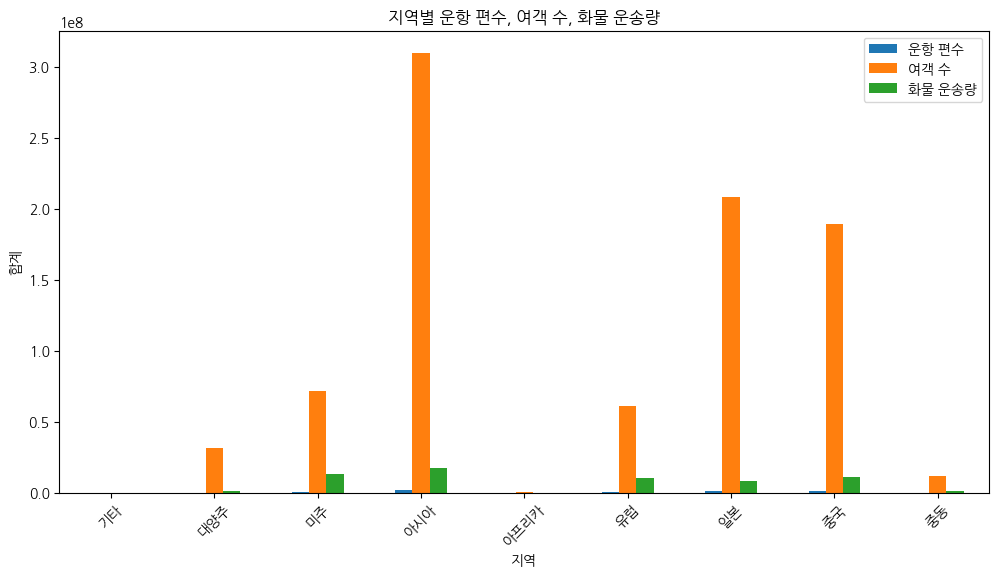

In [106]:
# "지역" 열을 기준으로 데이터 그룹화
grouped_by_region = df_region.groupby("지역")

# 각 지역별 운항 편수, 여객 수, 화물 운송량의 합계 계산
region_stats = grouped_by_region[["운항_편" ,"여객_명", "화물_톤"]].sum()

# 각 지역별 운항 편수, 여객 수, 화물 운송량의 합계를 막대 그래프로 시각화
region_stats.plot(kind="bar", figsize=(12, 6))
plt.title("지역별 운항 편수, 여객 수, 화물 운송량")
plt.xlabel("지역")
plt.ylabel("합계")
plt.xticks(rotation=45)
plt.legend(["운항 편수", "여객 수", "화물 운송량"])
plt.show()

In [117]:
df_region.tail()

,지역,시점,도착출발,운항_편,여객_명,화물_톤,연도,월
3801,기타,2022-12-01,출발,0,0,0,2022,12
3802,기타,2023-01-01,도착,0,0,0,2023,1
3803,기타,2023-01-01,출발,0,0,0,2023,1
3804,기타,2023-05-01,도착,0,0,0,2023,5
3805,기타,2023-05-01,출발,1,0,0,2023,5


In [121]:
year_region = pd.crosstab(index=df_region["연도"], columns=df_region["지역"], values=df_region["운항_편"], aggfunc="sum").fillna(0)

year_region.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,239,"3,836","26,937","47,148",0,"14,498","44,682","47,043","2,024"
2006,98,"4,313","29,170","53,355",1,"15,556","48,452","60,190","2,474"
2007,390,"4,610","29,987","65,485",0,"18,541","49,162","82,592","2,270"
2008,394,"5,511","28,627","63,791",2,"19,942","50,915","78,073","2,471"
2009,316,"5,399","27,719","56,168",0,"18,038","54,115","68,161","2,570"
2010,552,"6,119","29,616","64,018",3,"19,389","59,570","74,639","2,788"
2011,553,"8,250","30,001","79,046",4,"21,233","60,748","77,363","3,373"
2012,571,"9,631","29,845","92,740",173,"22,418","69,939","84,985","3,443"
2013,558,"10,718","30,551","101,289",540,"23,498","72,895","95,264","3,676"


In [123]:
year_region

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,239.0,3836.0,26937.0,47148.0,0.0,14498.0,44682.0,47043.0,2024.0
2006,98.0,4313.0,29170.0,53355.0,1.0,15556.0,48452.0,60190.0,2474.0
2007,390.0,4610.0,29987.0,65485.0,0.0,18541.0,49162.0,82592.0,2270.0
2008,394.0,5511.0,28627.0,63791.0,2.0,19942.0,50915.0,78073.0,2471.0
2009,316.0,5399.0,27719.0,56168.0,0.0,18038.0,54115.0,68161.0,2570.0
2010,552.0,6119.0,29616.0,64018.0,3.0,19389.0,59570.0,74639.0,2788.0
2011,553.0,8250.0,30001.0,79046.0,4.0,21233.0,60748.0,77363.0,3373.0
2012,571.0,9631.0,29845.0,92740.0,173.0,22418.0,69939.0,84985.0,3443.0
2013,558.0,10718.0,30551.0,101289.0,540.0,23498.0,72895.0,95264.0,3676.0


<Axes: xlabel='연도'>

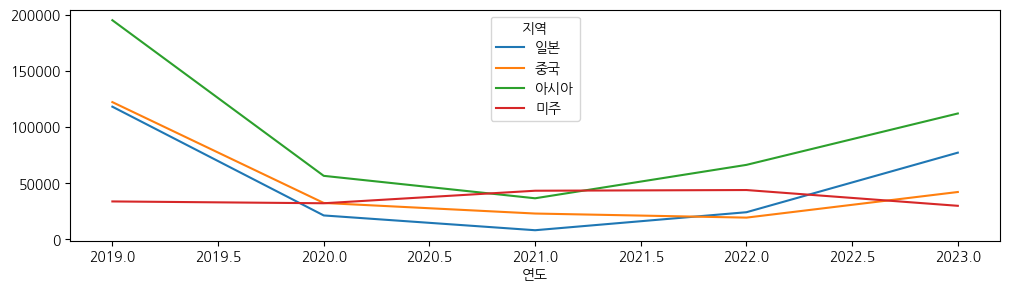

In [124]:
year_region.iloc[-5:][["일본","중국","아시아","미주"]].plot(figsize=(12, 3))

<Axes: xlabel='연도'>

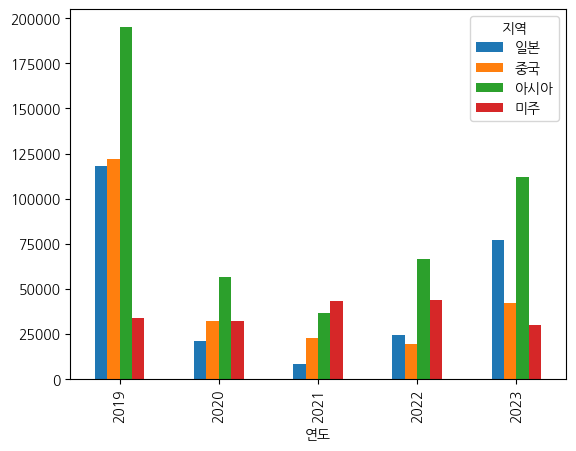

In [122]:
year_region.iloc[-5:][["일본","중국","아시아","미주"]].plot(kind="bar")

<Axes: xlabel='지역'>

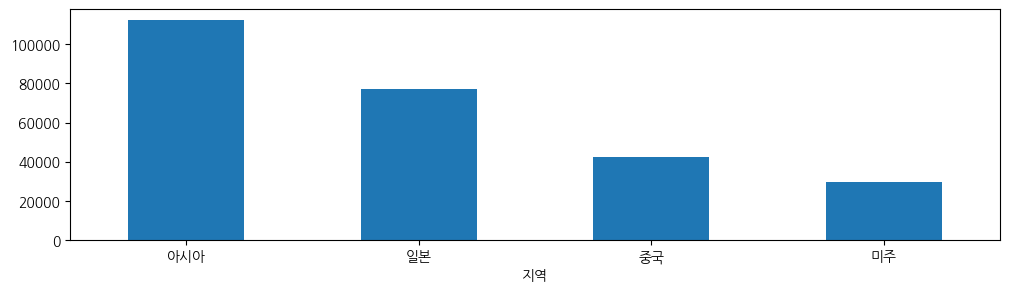

In [125]:
year_region.iloc[-1][["일본","중국","아시아","미주"]].sort_values(ascending=False).plot(figsize=(12, 3), kind="bar", rot=0)

<Axes: xlabel='지역'>

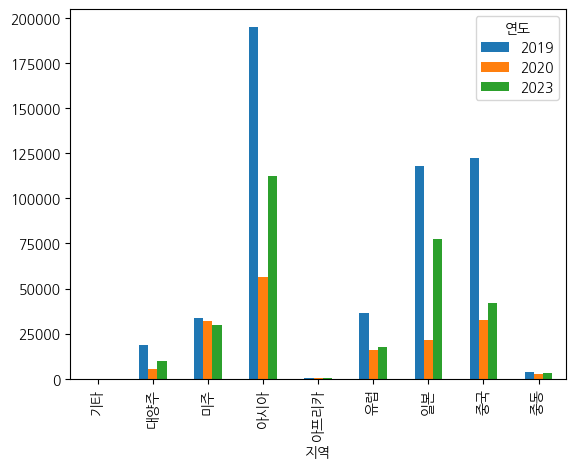

In [128]:
year_region.loc[[2019, 2020, 2023]].T.plot(kind="bar")

In [133]:
df_month = df_region[df_region["월"] == 3]
year_region_m = pd.crosstab(index=df_month["연도"], columns=df_month["지역"], values=df_month["운항_편"], aggfunc="sum").fillna(0)

year_region_m.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,2,313,"2,305","3,721",0,"1,148","3,702","3,493",106
2006,10,337,"2,365","4,229",0,"1,288","4,012","4,221",206
2007,13,365,"2,510","5,150",0,"1,459","4,135","6,600",172
2008,31,486,"2,385","5,645",0,"1,634","4,189","6,845",211
2009,31,453,"2,335","4,769",0,"1,536","4,419","5,888",202
2010,42,477,"2,453","5,028",0,"1,582","4,759","5,730",219
2011,36,654,"2,515","6,246",1,"1,687","5,234","5,937",277
2012,44,744,"2,464","7,339",0,"1,777","5,617","6,416",287
2013,44,886,"2,601","8,434",28,"1,996","6,206","7,237",318


In [137]:
df_region

,지역,시점,도착출발,운항_편,여객_명,화물_톤,연도,월
0,일본,2005-01-01,도착,1733,351340,16217,2005,1
1,일본,2005-01-01,출발,1736,379355,17319,2005,1
2,일본,2005-02-01,도착,1662,361438,16566,2005,2
3,일본,2005-02-01,출발,1655,343217,16572,2005,2
4,일본,2005-03-01,도착,1852,386047,18001,2005,3
...,...,...,...,...,...,...,...,...
3801,기타,2022-12-01,출발,0,0,0,2022,12
3802,기타,2023-01-01,도착,0,0,0,2023,1
3803,기타,2023-01-01,출발,0,0,0,2023,1
3804,기타,2023-05-01,도착,0,0,0,2023,5


In [138]:
ym = pd.crosstab(df_region["연도"], df_region["월"], values=df_region["여객_명"], aggfunc="sum")
ym.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

월,1,2,3,4,5,6,7,8,9,11,12
연도,,,,,,,,,,,
2005,"5,114,876","2,288,820","2,299,773","2,328,959","2,365,823","2,473,956","2,740,435","3,022,313","2,379,021","2,385,822","2,415,678"
2006,"5,544,001","2,549,673","2,492,223","2,530,907","2,625,165","2,628,982","2,908,073","3,244,183","2,686,897","2,806,500","2,831,425"
2007,"6,288,355","2,850,772","2,971,853","2,864,007","3,006,044","2,989,737","3,346,495","3,618,076","2,970,149","3,056,207","3,073,666"
2008,"6,315,869","3,175,760","2,989,312","2,938,348","3,084,518","2,911,683","3,118,589","3,301,687","2,582,040","2,517,793","2,587,000"
2009,"5,650,868","2,725,041","2,698,756","2,724,696","2,581,066","2,447,316","3,074,060","3,401,219","2,658,910","2,717,942","3,002,313"
2010,"6,878,921","3,067,126","3,284,387","3,155,342","3,270,964","3,201,611","3,584,625","3,912,356","3,321,311","3,330,299","3,258,181"
2011,"7,493,721","3,325,666","3,207,187","3,091,762","3,338,794","3,452,129","3,963,720","4,255,215","3,577,082","3,523,136","3,643,026"
2012,"8,061,868","3,766,647","3,718,727","3,789,394","3,835,926","3,925,031","4,367,841","4,748,209","3,908,356","3,841,147","3,997,145"
2013,"8,718,395","4,045,269","4,186,603","3,895,433","3,899,971","4,166,124","4,661,545","5,155,519","4,300,851","4,019,963","4,240,298"
